In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import cv2
count=0
for subdir,dirs,files in os.walk("/kaggle/input/dermnet/train"):
    for file in files:
        path = os.path.join("/kaggle/input/dermnet/train",subdir , file)
        print(path)
        img = cv2.imread(path,0)
#         print(img)
        height, width = img.shape[:2]
        print(height," ",width)
        count+=1
        if(count > 50):
            break
        
    
count-1

/kaggle/input/dermnet/train/Light Diseases and Disorders of Pigmentation/sun-damaged-skin-67.jpg
480   720
/kaggle/input/dermnet/train/Light Diseases and Disorders of Pigmentation/sun-damaged-skin-91.jpg
472   720
/kaggle/input/dermnet/train/Light Diseases and Disorders of Pigmentation/sun-damaged-skin-61.jpg
472   720
/kaggle/input/dermnet/train/Light Diseases and Disorders of Pigmentation/albinism-2.jpg
495   720
/kaggle/input/dermnet/train/Light Diseases and Disorders of Pigmentation/sun-damaged-skin-104.jpg
480   720
/kaggle/input/dermnet/train/Light Diseases and Disorders of Pigmentation/freckles-1.jpg
720   472
/kaggle/input/dermnet/train/Light Diseases and Disorders of Pigmentation/polymorphous-light-eruption-37.jpg
464   720
/kaggle/input/dermnet/train/Light Diseases and Disorders of Pigmentation/porphyrias-65.jpg
472   720
/kaggle/input/dermnet/train/Light Diseases and Disorders of Pigmentation/melasma-25.jpg
595   395
/kaggle/input/dermnet/train/Light Diseases and Disorders o

72

In [4]:
batch_size = 32
img_height = 224
img_width = 224

train_dataset = tf.keras.utils.image_dataset_from_directory(
  directory="/kaggle/input/dermnet/train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15557 files belonging to 23 classes.
Using 12446 files for training.


In [5]:
class_names = train_dataset.class_names
print(class_names)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


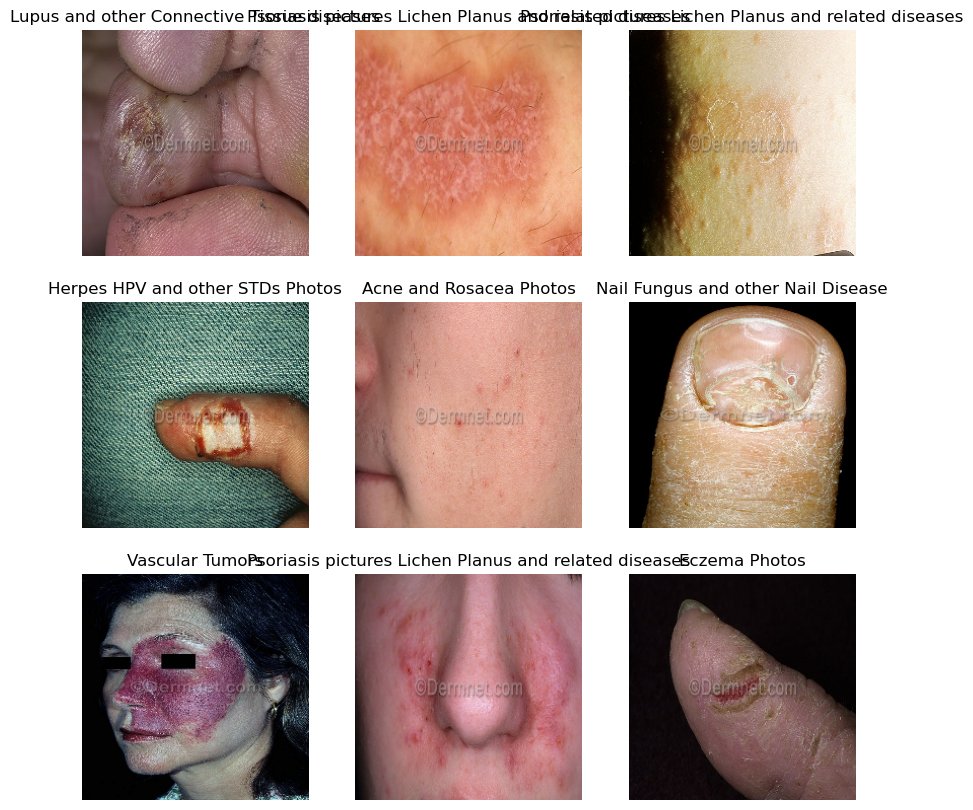

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(directory = "/kaggle/input/dermnet/train",
                                                                 shuffle=True,
                                                                 batch_size=32,subset="validation",validation_split=0.2,seed=123,
 
                                                                 image_size=(img_height, img_width))

Found 15557 files belonging to 23 classes.
Using 3111 files for validation.


In [8]:


#train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
#validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
# test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

**Reference for the augmentation**::**Data Set Preparation Using the Method of Data Augmentation for Classification of
Skin Diseases **


LINK::https://www.researchgate.net/publication/355347178_Data_Set_Preparation_Using_the_Method_of_Data_Augmentation_for_Classification_of_Skin_Diseases/link/616ad850b90c5126624dd96e/download

In [9]:
# examining these layers 
horfl = tf.keras.layers.RandomFlip('horizontal') 
verfl=tf.keras.layers.RandomFlip('vertical')
bright =tf.keras.layers.RandomBrightness([-0.4,0.4])
rot=tf.keras.layers.RandomRotation(0.2)


In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(6,14))
 
for images, labels in train_dataset.take(5):
    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # resize
        ax[1][i].imshow(horfl(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("horizontal flip")
        # height
        ax[2][i].imshow(verfl(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("vertical flip")
        # width
        ax[3][i].imshow(bright(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("brightness")
        # zoom
        ax[4][i].imshow(rot(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("rotation")
plt.show()

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds1 = ds.map(lambda x, y: (horfl(x, training=True), y), num_parallel_calls=AUTOTUNE)
  ds2 = ds.map(lambda x, y: (verfl(x, training=True), y), num_parallel_calls=AUTOTUNE)
  ds3 = ds.map(lambda x, y: (bright(x, training=True), y), num_parallel_calls=AUTOTUNE)
  ds4 = ds.map(lambda x, y: (rot(x, training=True), y), num_parallel_calls=AUTOTUNE)
  ds = ds.concatenate(ds1).concatenate(ds2).concatenate(ds3).concatenate(ds4)
  # Use buffered prefetching on all datasets.
  ds = ds.shuffle(buffer_size=len(ds))  

  return ds.prefetch(buffer_size=AUTOTUNE)

In [12]:
train_dataset_aug =prepare(train_dataset,True,True)

**plotting label vs count in dataset and augmented data set**

In [13]:
#plotting the data with tensor is going to be a tough optionm
plot={}
dir='/kaggle/input/dermnet/train'
for i in os.listdir(dir):
    curfol=os.path.join(dir,i)
    x=len(os.listdir(curfol))
    plot[i]=x
plotaug={i:plot[i]*5 for i in plot.keys()}
    

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

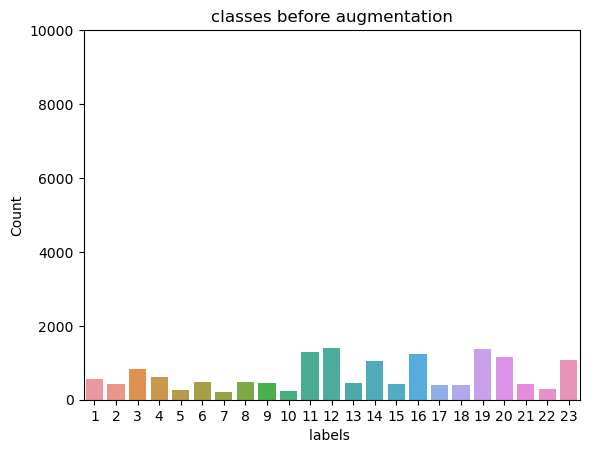

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a pandas DataFrame from the dictionary
df = pd.DataFrame.from_dict(plot, orient='index', columns=['count'])



df = df.reset_index()
# Create a barplot using seaborn
sns.barplot(x=df.index+1, y='count', data=df)

# Set the title and axis labels
plt.title('classes before augmentation')
plt.xlabel('labels ')
plt.ylabel('Count')
plt.ylim(0, 10000)

# Show the plot
plt.show()


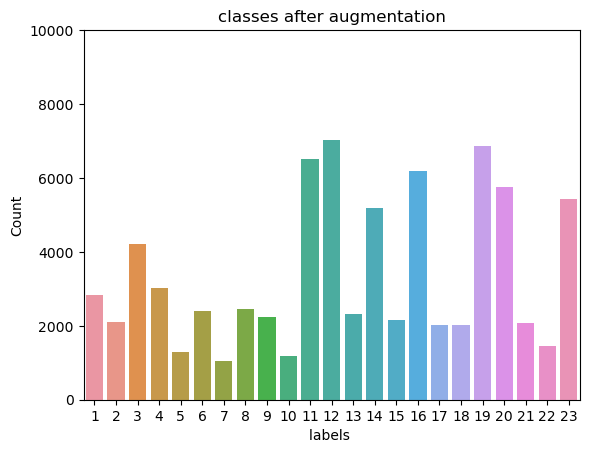

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create a pandas DataFrame from the dictionary
df = pd.DataFrame.from_dict(plotaug, orient='index', columns=['count'])



df = df.reset_index()
# Create a barplot using seaborn
sns.barplot(x=df.index+1, y='count', data=df)

# Set the title and axis labels
plt.title('classes after augmentation')
plt.xlabel('labels ')
plt.ylabel('Count')
plt.ylim(0, 10000)

# Show the plot
plt.show()


# Main part ::Training ha ha ha !!
Since our data is bulky we have to generate data in batches

In [17]:
dirtrain='/kaggle/input/dermnet/train'
dirtest='/kaggle/input/dermnet/test'
def df(path:str):
    datagen={}
    for i in os.listdir(path):
        for label in os.listdir(os.path.join(path,i)):
            datagen[os.path.join(path,i,label)]=i
    return pd.DataFrame(datagen.items())
dftrain=df(dirtrain)
dftest=df(dirtest)

In [18]:
column=['Image','Label']
dftrain.columns=column
dftest.columns=column


In [19]:
from keras.preprocessing.image import ImageDataGenerator
train_data_gen  = ImageDataGenerator(
                                    rescale=1 / 255.0,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    validation_split=0.2,
                                    fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1 / 255.0)
batch_size = 32
train_generator = train_data_gen.flow_from_dataframe(
    dataframe=dftrain,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="categorical",#sparse
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_data_gen.flow_from_dataframe(
    dataframe=dftrain,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=8,
    class_mode='categorical', #sparse
    subset='validation',
    shuffle=True,
    seed=42 
)
test_generator = test_data_gen.flow_from_dataframe(
    dataframe=dftest,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=8,
    class_mode='categorical',
    shuffle=False,
)

Found 12446 validated image filenames belonging to 23 classes.
Found 3111 validated image filenames belonging to 23 classes.
Found 4002 validated image filenames belonging to 23 classes.


In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten
basemodel = VGG19(include_top = False,
              weights='imagenet',input_shape=(256, 256, 3))
print('Model loaded.')
for layer in basemodel.layers:
    layer.trainable=False

80134624/80134624 [==============================] - 0s 0us/step
Model loaded.


In [21]:
x=basemodel.output
x=Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(train_dataset.class_names), activation='softmax')(x)
model = Model(inputs=basemodel.input, outputs=predictions)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=["categorical_accuracy"])



In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [23]:
with tf.device('/GPU:0'):
    history = model.fit(train_generator, 
                        epochs=100, 
                        validation_data=valid_generator)


Epoch 1/100
389/389 [==============================] - 462s 1s/step - loss: 2.6976 - categorical_accuracy: 0.2050 - val_loss: 10.7800 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
389/389 [==============================] - 371s 954ms/step - loss: 2.4007 - categorical_accuracy: 0.2393 - val_loss: 11.5386 - val_categorical_accuracy: 0.0000e+00
Epoch 3/100
389/389 [==============================] - 361s 927ms/step - loss: 2.3586 - categorical_accuracy: 0.2486 - val_loss: 15.9708 - val_categorical_accuracy: 0.0000e+00
Epoch 4/100
389/389 [==============================] - 366s 940ms/step - loss: 2.3217 - categorical_accuracy: 0.2589 - val_loss: 14.2466 - val_categorical_accuracy: 0.0000e+00
Epoch 5/100
389/389 [==============================] - 363s 933ms/step - loss: 2.3000 - categorical_accuracy: 0.2692 - val_loss: 17.2923 - val_categorical_accuracy: 0.0000e+00
Epoch 6/100
389/389 [==============================] - 363s 932ms/step - loss: 2.2810 - categorical_accuracy: 0.2688 - val_

In [24]:
vgg_preds = model.predict(test_generator)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

501/501 [==============================] - 63s 125ms/step


In [25]:
from sklearn.metrics import accuracy_score
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())


vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG19 Model Accuracy: {:.2f}%".format(vgg_acc * 100))

VGG19 Model Accuracy: 25.04%


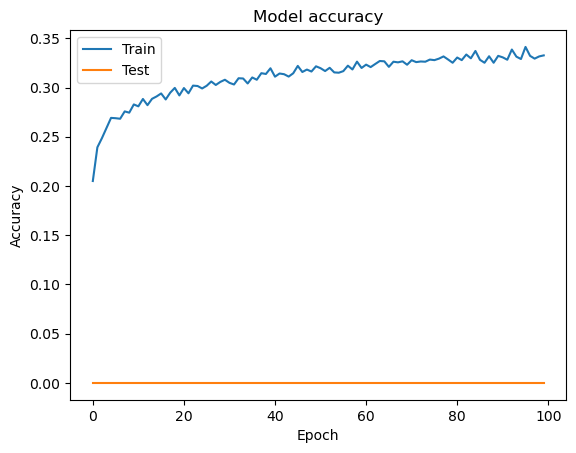

In [26]:
#plot accuracy vs epoch
plt.plot(history.history['categorical_accuracy']) #sparse_categorical_accuracy
plt.plot(history.history['val_categorical_accuracy']) #val_sparse_categorical_accuracy
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

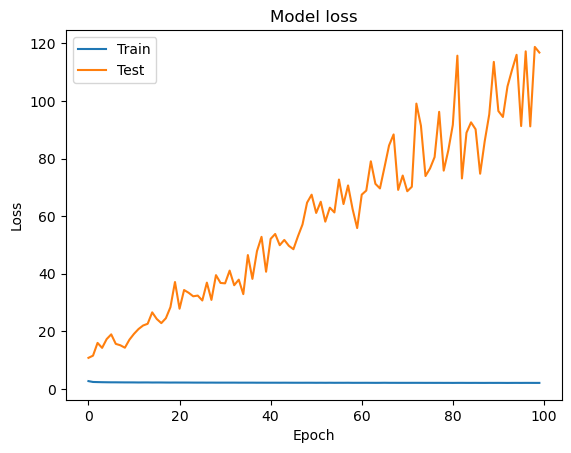

In [27]:
# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
os.chdir('/kaggle/working')
model.save('/kaggle/working/vgg19notrain.h5')
model.save('/kaggle/working/vgg19notrain.h5', save_format="h5")